In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm

## Esercizio 1

$X \sim P(\lambda)$

#### 1. 
Il parametro lambda, in una distrubuzione di poisson, rappresenta la media del numero di eventi che si verificano in un certo periodo di tempo, dunque può assumere un valore maggiore di 1 ma non può assumere valori negativi, in quanto non avrebbe 
senso parlare di un numero negativo di eventi verificati. Inoltre, per come è definita la funzione di massa di probabilità di una v.a. di poisson, se lambda fosse negativa ci sarebbero dei casi in cui la funzione assumerebbe valori negativi, il che è impossibile perchè
una funzione di massa di probabilità di una generica v.a. discreta deve avere come codominio [0, 1] (in quanto rappresenta una probabilità).

#### 2.
$\mathbb{E}[X] = \lambda$

$\sigma_X = \sqrt{\lambda}$

$\sigma^2_X = \mathbb{E}[X]$

#### 3.
Sia $Y \sim X$,    Y indipendente da X

$p(x) = P(X + Y = x)$

Sia Q = X + Y, allora per la riproducibilità della distribuzione di possion $Q \sim P(\lambda + \lambda)=P(2\lambda)$

$p(x) = e^{-2\lambda} \frac{(2\lambda)^x}{x!}$

#### 4.

In [17]:
l = 0.9
Q = st.poisson(2*l)

In [18]:
# scelgo il valore massimo utilizzando la funzione di ripartizione inversa con un parametro prossimo all'1, in questo modo sono sicuro di  includere nel grafico 
# tutti i punti per cui la funzione di massa di probabilità assume valori significativi (non prossimi allo zero)

x_max = Q.ppf(0.9999)
values = range(0, int(x_max) + 1) # aggiungo uno perché l'estremo superiore viene escluso dal range

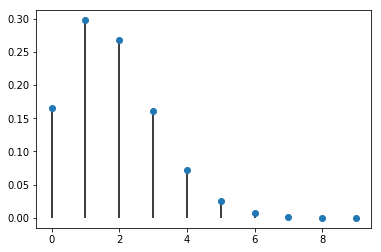

In [19]:
plt.vlines(values, 0, Q.pmf(values)) # grafico a bastoncini perché lavoriamo con parametri naturali, quindi barre aventi spessore o linee poligonali potrebbero confondere l'osservatore, dando un senso di falsa continuità
plt.plot(values, Q.pmf(values), 'o')
plt.show()

#### 5.
$ S \sim P(n\lambda) $

## Esercizio 2

$X_1, \ldots, X_n$  i.i.d  come $X \sim P(\lambda) $

#### 1.
$n=3$

$T = X_1 + X_2 - X_3$

$\mathbb{E}(T) = \mathbb{E}(X_1 + X_2 - X_3) = \mathbb{E}(X_1) + \mathbb{E}(X_2) - \mathbb{E}(X_3) = \mathbb{E}(X) + \mathbb{E}(X) - \mathbb{E}(X) = \mathbb{E}(X) = \lambda $

T è uno stimatore non deviato per $\lambda$ in quanto il valore atteso di T coincide con la quantità che vogliamo stimare, ovvero $\lambda$.


$U = \frac{1}{5}(2X_1 +2 X_2 + X_3)$

$ \mathbb{E}(U) = \mathbb{E}(\frac{1}{5}(2X_1 +2 X_2 + X_3)) = \frac{1}{5}[ \mathbb{E}(2X_1 +2 X_2 + X_3)] = \frac{1}{5}[ \mathbb{E}(2X_1) +  \mathbb{E}(2 X_2) +  \mathbb{E}(X_3)] = \frac{1}{5}[ 2\mathbb{E}(X_1) +  2\mathbb{E}(X_2) +  \mathbb{E}(X_3)] 
 = \frac{1}{5}[ 2\mathbb{E}(X) +  2\mathbb{E}(X) +  \mathbb{E}(X)] = \frac{1}{5}[ 2\lambda +  2\lambda +  \lambda] = \lambda$
 
 U è uno stimatore non deviato per $\lambda$ in quanto il valore atteso di U coincide con la quantità che vogliamo stimare, ovvero $\lambda$.
 
 !QUI HO UN DUBBIO SU DUE POSSIBILI RISPOSTE!
 
  1) Non possiamo valutare se questi stimatori sono consistenti in media quadratica perché n, essendo fissato a 3, non comparirà mai come parametro. Quindi non possiamo valutare cosa succede quando n tende a infinito
  
  2) Calcolo la varianza di entrambi gli stimatori (nel risultato non comparirà n come parametro), ne calcolo il limite per n che tende a infinito, ma n non c´è quindi il risultato non cambia e dunque non sono consistenti in media quadratica

#### 2.
$ \overline{X}$ non è distribuito secondo uno dei modelli studiati

$ P(\overline{X} = x) = P(\frac{1}{n}\sum_{i=1}^{n}X_i = x) = P( \sum_{i=1}^{n}X_i = nx) $

Per le proprietà della distribuzione di poisson e il fatto che le $X_i$ sono i.i.d, la quantità $Q=\sum_{i=1}^{n}X_i$ è distribuita come una v.a. di poisson di parametro $n\lambda$, quindi:

$ P( \sum_{i=1}^{n}X_i = nx) =  P(Q = nx) = e^{-n\lambda} \frac{(n\lambda)^{nx}}{(nx)!}$

#### 3.
$\overline{X}$ può essere approssimato con una distribuzione normale, $\overline{X} \dot{\sim} N(\lambda, \frac{\sqrt{\lambda}}{\sqrt{n}}) $

Grazie al teorema centrale del limite sappiamo che $ \sum_{i=1}^{n}X_i \dot{\sim} N(n\mu_x, \sqrt{n}\sigma_x)$, dove questa approssimazione è tanto migliore quanto n è grande.

Ora, grazie alle proprietà della distribuzione normale, sappiamo che:  $  (a\sum_{i=1}^{n}X_i) \dot{\sim} N(an\mu_x, a\sqrt{n}\sigma_x)$, dunque se poniamo $ a = \frac{1}{n}$ otteniamo:

$  (\frac{1}{n}\sum_{i=1}^{n}X_i) \dot{\sim} N(\frac{1}{n}n\mu_x, \frac{1}{n}\sqrt{n}\sigma_x) = N(\mu_x, \frac{1}{\sqrt{n}}\sigma_x) = N(\lambda, \frac{1}{\sqrt{n}}\sqrt{\lambda})$

#### 4.
$\overline{X}$ è sempre uno stimatore non deviato per $\mathbb{E}(X)$, infatti  $\mathbb{E}(\overline{X})=\mathbb{E}(X) = \lambda$

$b_{\lambda}(\overline{X}) = \mathbb{E}(\overline{X}) - \lambda = 0$

$MSE_{\lambda}(\overline{X}) = Var(\overline{X}) + b_{\lambda}(\overline{X})^2 = Var(\overline{X}) = Var(\frac{1}{n}\sum_{i=1}^{n}X_i) = \frac{1}{n^2}Var(\sum_{i=1}^{n}X_i) = \frac{1}{n^2}\sum_{i=1}^{n}Var(X_i) = \frac{1}{n^2}\sum_{i=1}^{n}Var(X) = \frac{1}{n^2}\sum_{i=1}^{n}\lambda = \frac{\lambda}{n}$

Se considero $n\to+\infty $, MSE $\to 0$ quindi $\overline{X}$ è consistente in media quadratica rispetto a $\mathbb{E}(X)$

#### 5.
non ripeto i calcoli fatti sopra, osservo che in una distribuzione di poisson $\mathbb{E}(X) = Var(X)$ e quindi valgono tutte le osservazioni fatte precedentemente

#### 6.
$\overline{X}$ è deviato rispetto a $\sigma_X=\sqrt{\lambda}$

$b_{\sqrt{\lambda}}(\overline{X}) = \mathbb{E}(\overline{X}) - \sqrt{\lambda} = \lambda - \sqrt{\lambda}$

$MSE_{\sqrt{\lambda}}(\overline{X}) = Var(\overline{X}) + b_{\sqrt{\lambda}}(\overline{X})^2 =  \frac{\lambda}{n} + (\lambda - \sqrt{\lambda})^2$

Se considero $n\to+\infty $, MSE $\to 0$ quindi $\overline{X}$ è consistente in media quadratica rispetto a $\sigma_X$

#### 7.
$n = 1125$

Sia $Z \sim N(0, 1)$

$P(|\overline{X}-\lambda| \le \epsilon) = P(-\epsilon \le \overline{X}-\lambda \le \epsilon) \simeq P(-\frac{\epsilon \sqrt{n}}{\sqrt{\lambda}} \le Z \le \frac{\epsilon \sqrt{n}}{\sqrt{\lambda}}) = \Phi(\frac{\epsilon \sqrt{n}}{\sqrt{\lambda}}) -  \Phi(-\frac{\epsilon \sqrt{n}}{\sqrt{\lambda}}) = \Phi(\frac{\epsilon \sqrt{n}}{\sqrt{\lambda}}) - (1 - \Phi(\frac{\epsilon \sqrt{n}}{\sqrt{\lambda}})) = 2\Phi(\frac{\epsilon \sqrt{n}}{\sqrt{\lambda}}) - 1 = 2\Phi(\frac{\epsilon \sqrt{1125}}{\sqrt{\lambda}}) - 1$

## Esercizio 3

In [20]:
# uso il dataset facsimile che si trova sul gruppo telegram
data = pd.read_csv('rilevazioni.csv', sep=';')
data.head(2)

,temperatura,blocchidanneggiati,raffreddamento
0,46.024489,0.0,1.0
1,83.225486,0.0,1.0


#### 1.

In [21]:
len(data) # numero casi nel dataset

1727

In [22]:
pd.isnull(data).any() # attributi che hanno almeno un valore mancante

temperatura           False
blocchidanneggiati    False
raffreddamento         True
dtype: bool

In [23]:
sum(pd.isnull(data['raffreddamento'])) # numero casi che contengono almeno un valore mancante

5

#### 2.

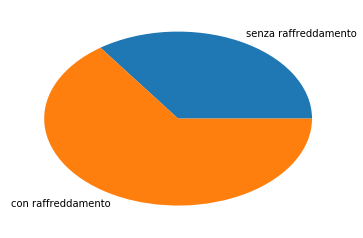

In [24]:
# diagramma a torta perchè l'attributo è binario, quindi ho solo due colori che risultano distinguibili facilmente. Ho subito un idea delle proporzioni delle osservazioni
raff_freq = data['raffreddamento'].value_counts(normalize=True).sort_index()
plt.pie(raff_freq, labels=['senza raffreddamento', 'con raffreddamento'])
plt.show()

In [25]:
# dal grafico si nota che la maggior parte delle osservazioni registrate ha il raffreddamento attivo

#### 3.

In [26]:
data[data['raffreddamento'] == 0]['temperatura'].mean(),  data[data['raffreddamento'] == 1]['temperatura'].mean() # TODO: forse ANOVA? SCATTER PLOT? INDICE DI CORRELAZIONE (si può fare scatter plot o indice di corr. se un attributo è binario?) O va bene così?

(60.765252036957826, 58.847900257623103)

In [27]:
# sembra che la temperatura non influisca, perchè la media dei gruppi è molto simile

#### 4.

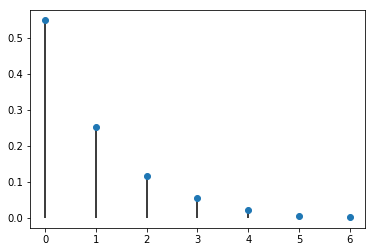

In [28]:
blocchi_freq = data['blocchidanneggiati'].value_counts(normalize=True).sort_index() # più si considerano numeri elevati di blocchi danneggiati, più le frequenze diminuiscono.
plt.vlines(blocchi_freq.index, 0, blocchi_freq.values) # grafico a bastoncini perchè consideriamo valori da 0 a 6 interi quindi ....
plt.plot(blocchi_freq.index, blocchi_freq.values, 'o')
plt.show()

#### 5.
non sono per niente sicuro di come ho svolto questo esercizio

In [29]:
pd.crosstab(data['blocchidanneggiati'], columns=[data['raffreddamento']], margins=True)

raffreddamento,0.0,1.0,All
blocchidanneggiati,,,
0.0,116,830,946
1.0,181,253,434
2.0,166,34,200
3.0,89,5,94
4.0,37,0,37
5.0,8,0,8
6.0,3,0,3
All,600,1122,1722


In [30]:
# R = raffreddamento attivato
# D = almeno un blocco danneggiato

In [31]:
# P(D)
(1722 - 946)/1722, 1 - 946/1722 # entrambi i metodi sono validi

(0.45063879210220675, 0.4506387921022067)

In [32]:
# P(R intersezione D)
# P(R intersezione D) = P(R | D) * P(D)
((1122-830)/(1722-946)) * ((1722 - 946)/1722)

0.16957026713124274

In [33]:
# P(D | R)
(1122-830)/1122

0.26024955436720143

In [34]:
# P(R | !D)
830/946

0.8773784355179705

In [35]:
# TODO: perché non devono sommare a 1? forse perchè l'unione degli eventi che queste probabilità considerano non sono l´insieme universo?

## Esercizio 4

#### 1.

In [36]:
raffreddamento_si = data[data['raffreddamento'] == 1]['blocchidanneggiati']
raffreddamento_no = data[data['raffreddamento'] == 0]['blocchidanneggiati']

#### 2.

In [37]:
decili = [i/10 for i in range(0, 11)]
decili_si = raffreddamento_si.quantile(decili)
decili_no = raffreddamento_no.quantile(decili)

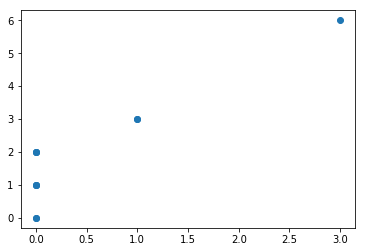

In [38]:
plt.plot(decili_si, decili_no, 'o')
plt.show()

In [39]:
# dal grafico confermo l'ipotesi che la distribuzione del numero di blocchi danneggiati sia dipendente dal funzionamento del sistema di raffreddamento automatico.
# Questo perché dal qqplot empirico le due distribuzioni risultano diverse, ma dato che sono diverse a causa della separazione in gruppi per funzionamento o meno del sistema di raffreddamento, possiamo
# inferire che il numero di blocchi danneggiati sia dipendente dal funzionamento del sistema di raffreddamento.

In [40]:
# altri metodi per la verifica sono:

In [41]:
raffreddamento_si.mean(), raffreddamento_no.mean() # i blocchi si sono rotti più facilmente quando il raffreddamento era spento

(0.29946524064171121, 1.6433333333333333)

In [42]:
# TODO: funzione di ripartizione empirica? 

#### 3.

In [43]:
raffreddamento_si.mean() # stimo il valore atteso della popolazione con la media campionaria

0.29946524064171121

#### 4.

In [44]:
X = st.poisson(raffreddamento_si.mean())

In [45]:
# non posso usare statsmodels perchè la funzione qqplot funziona solo con v.a. continue, quindi devo fare a mano

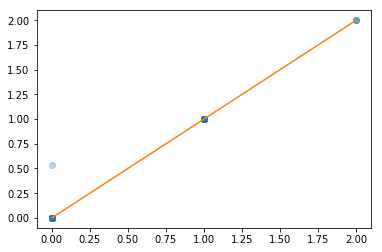

In [46]:
quantili = np.arange(0.01, 1.01, 0.01)
plt.plot(X.ppf(quantili), raffreddamento_si.quantile(quantili), 'o', alpha=0.3) # idea: dato che i punti si sovrappongono uso un po' di trasparenza sul colore per sottolineare la presenza di molteplici punti in una stessa posizione
plt.plot([0, 2], [0, 2])
plt.show() # i punti si distribuiscono circa sulla bisettrice, confermando l'ipotesi

In [47]:
raffreddamento_si.mean(), raffreddamento_si.var() # inoltre stima del valore atteso e stima della varianza sono molto simili, suggersce una distribuzione di poisson

(0.29946524064171121, 0.29739489664976365)

#### 5.

In [48]:
Y = st.poisson(raffreddamento_no.mean())

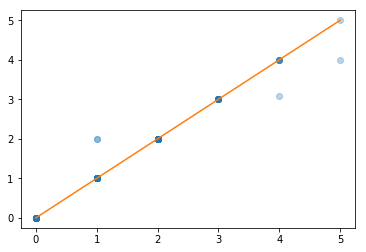

In [49]:
quantili = np.arange(0.01, 1.01, 0.01)
plt.plot(Y.ppf(quantili), raffreddamento_no.quantile(quantili), 'o', alpha=0.3)
plt.plot([0, 5], [0, 5])
plt.show() # i punti si distribuiscono circa sulla bisettrice, confermando l'ipotesi

#### 6.

(1) Stimatore per $Var(X_{SI})$: $\overline{X}$

(2) Stimatore per $\sqrt{Var(X_{SI})}$:

(3) Stimatore per $\lambda_{SI}$: $\overline{X}$

(1) e (3) sono non deviati rispetto alla quantita che stimano

(2) è deviato per la quantità che stima

(1), (2), (3) sono consistenti in media quadratica

#### 7.
$ P(|\overline{X} - \mu_X| > 0.1) $ 

$ P(|\overline{X} - \mu_X| > 0.1) = 1 - P(|\overline{X} - \mu_X| <= 0.1)$ !! non sono sicuro che questa equazione sia vera !!

riutilizzo i calcoli di un esercizio precedente:

$P(|\overline{X}-\lambda| \le \epsilon) = P(-\epsilon \le \overline{X}-\lambda \le \epsilon) \simeq P(-\frac{\epsilon \sqrt{n}}{\sqrt{\lambda}} \le Z \le \frac{\epsilon \sqrt{n}}{\sqrt{\lambda}}) = \Phi(\frac{\epsilon \sqrt{n}}{\sqrt{\lambda}}) -  \Phi(-\frac{\epsilon \sqrt{n}}{\sqrt{\lambda}}) = \Phi(\frac{\epsilon \sqrt{n}}{\sqrt{\lambda}}) - (1 - \Phi(\frac{\epsilon \sqrt{n}}{\sqrt{\lambda}})) = 2\Phi(\frac{\epsilon \sqrt{n}}{\sqrt{\lambda}}) - 1$

$ 1 - P(|\overline{X} - \mu_X| <= 0.1) = 1 - (2\Phi(\frac{0.1 \sqrt{n}}{\sqrt{\lambda}}) - 1)$

In [50]:
Z = st.norm()
n = len(raffreddamento_si)**.5
l = raffreddamento_si.mean()**.5
1 - (2*Z.cdf((0.1 * n) / l) - 1) # non sono per niente sicuro

9.2982999078117246e-10

#### 8.

In [51]:
sum(data['raffreddamento'] == 1)/len(data.dropna()) # non sono sicuro di questa risposta

0.65156794425087106

#### 9.

In [52]:
l_si = raffreddamento_si.mean()
l_no = raffreddamento_no.mean()

X_SI = st.poisson(l_si)
X_NO = st.poisson(l_no)

In [53]:
# P(X_SI > 4) = 1 - P(X_SI <= 4)
1 - X_SI.cdf(4)

1.565177694551334e-05

In [54]:
# P(X_NO > 4) = 1 - P(X_NO <= 4)
1 - X_NO.cdf(4)

0.026149440421429859

#### 10.

In [63]:
p = ((1 - X_SI.cdf(4)) * (sum(data['raffreddamento'] == 1)/len(data.dropna()))) + ((1 - X_NO.cdf(4)) *  (sum(data['raffreddamento'] == 0)/len(data.dropna())))
p

0.009121501478856436

#### 11.

!!! Non ne ho idea :( !!!

In [113]:
# se supponiamo che l'allarme possa scattare una sola volta al giorno allora questo ha senso

In [119]:
R = st.binom(365, p)
p2 = 1 - R.cdf(7)

In [118]:
B = st.binom(7500, p2)
B.mean()

151.26376558954658